En el presente Notebook, se va a utilizar el modelo de predicción PROPHET, del cual se obtuvo información accediendo a la página https://facebook.github.io/prophet/docs/quick_start.html#python-api

En primer lugar, se separarán los datos de partida en train (hasta el 2023) y test (a partir del 2023) para poder determinar la precisión de cada uno de los modelos obtenidos. A partir de las métricas obtenidas, se decidirá si se sigue trabajando en todos los modelos o se selecciona solo alguno por tener un valor alto de r2.

In [1]:
import numpy as np
import pandas as pd
from prophet import Prophet

from datetime import datetime

import json
from pandas import Timestamp

import requests
from pprint import pprint

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Dropout

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import MinMaxScaler

# Generación por tecnologías

En primer lugar, cargamos los datos de Generación Diaria por tecnología, separándolos en train y test y teniendo en cuenta que para que el modelo de Prophet funcione, este debe constar de únicamente 2 columnas: una de fecha ("ds") en formato datetime y una de valores ("y").

In [2]:
gen_x_tech=pd.read_csv("GeneracionDiariaXTecnologia.csv")
gen_x_tech.head(3)

Fechas  Generación Hidráulica GWh  Generación Nuclear GWh  \
0  2014-08-01                      72.26                  144.09   
1  2014-08-02                      61.77                  143.48   
2  2014-08-03                      55.57                  143.32   

   Generación Carbón GWh  Generación Motores diésel GWh  \
0                 182.97                           9.95   
1                 147.79                           9.79   
2                 162.48                           9.40   

   Generación Turbina de gas GWh  Generación Turbina de vapor GWh  \
0                           3.37                             6.02   
1                           2.77                             5.34   
2                           2.75                             4.58   

   Generación Ciclo combinado GWh  Generación Hidroeólica GWh  \
0                           72.49                        0.01   
1                           50.52                        0.01   
2                           61.77                        0.01   

   Generación Eólica GWh  Generación Solar fotovoltaica GWh  \
0                 119.24                              27.77   
1                 117.57                              27.90   
2                  41.36                              30.14   

   Generación Otras renovables GWh  Generación Cogeneración GWh  \
0                            11.44                        68.36   
1                            11.56                        61.90   
2                            11.49                        57.00   

   Generación Residuos no renovables GWh  Generación Residuos renovables GWh  \
0                                   6.15                                2.20   
1                                   6.13                                2.10   
2                                   6.16                                2.05   

   Generación Solar térmica GWh  
0                         18.85  
1                         21.27  
2                         25.43

In [3]:
gen_x_tech.shape

(3298, 16)

In [4]:
gen_x_tech["Fechas"] = gen_x_tech["Fechas"].apply(lambda x : datetime.strptime(x,"%Y-%m-%d"))

In [5]:
train_gen_x_tech = gen_x_tech[:3075]

test_gen_x_tech = gen_x_tech[3075:]

In [6]:
generacion_tech= pd.DataFrame(train_gen_x_tech["Fechas"])
generacion_tech = generacion_tech.rename(columns = {"Fechas":"ds"})
generacion_tech

ds
0    2014-08-01
1    2014-08-02
2    2014-08-03
3    2014-08-04
4    2014-08-05
...         ...
3070 2022-12-27
3071 2022-12-28
3072 2022-12-29
3073 2022-12-30
3074 2022-12-31

[3075 rows x 1 columns]

19:16:56 - cmdstanpy - INFO - Chain [1] start processing
19:16:56 - cmdstanpy - INFO - Chain [1] done processing


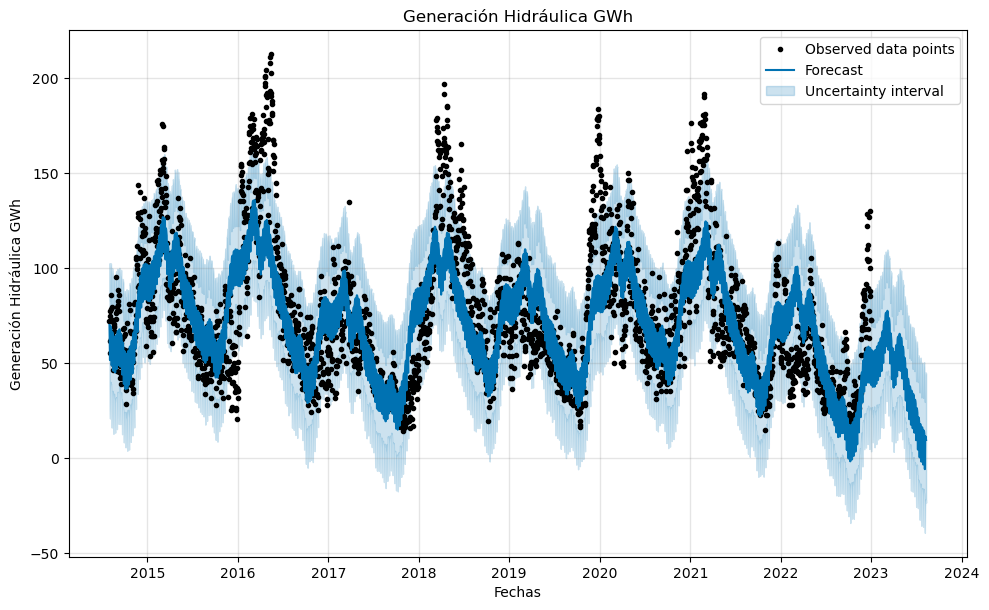

In [7]:
# El input de Prophet debe ser siempre un dataframe de dos columnas, una con la fecha (ds) y otra con los valores (y)

generacion_tech["y"]=train_gen_x_tech.loc[:,"Generación Hidráulica GWh"]

# Inicializamos un objeto Prophet y lo entrenamos con el dataframe.

m = Prophet()
m.fit(generacion_tech)
# Extendemos el dataframe para un número concreto de días futuros

future = m.make_future_dataframe(periods = 223)
    
# EL método de predicción asigna un yhat a cada una de las fechas
#Este método devuelve un dataframe con la predicción futura y la incertidumbre de dichos valores

forecast = m.predict(future)
    
# Graficamos las predicciones

fig1 = m.plot(forecast)

plt.xlabel("Fechas")
plt.ylabel(f"Generación Hidráulica GWh")
plt.title(f"Generación Hidráulica GWh")
plt.legend()
plt.savefig(f"Forecast Prophet - Generación Hidráulica GWh.png")
plt.show()

pred_prophet = forecast["yhat"][(-223):].reset_index(drop = True)
target = test_gen_x_tech["Generación Hidráulica GWh"].reset_index(drop = True)
    
mae = mean_absolute_error(target, pred_prophet)
mse = mean_squared_error(target, pred_prophet)
r2 = r2_score(target, pred_prophet)

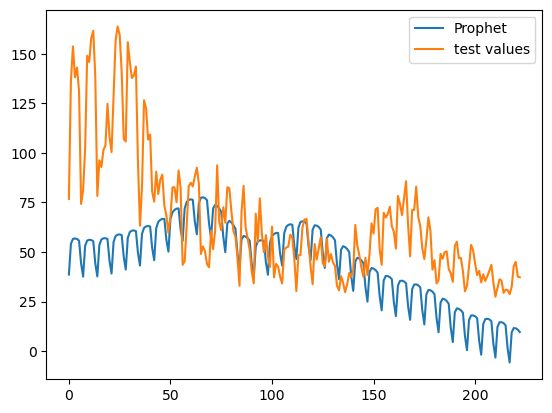

In [8]:
plt.plot(pred_prophet, label = "Prophet")
plt.plot(target, label = "test values")
plt.legend()
plt.show()

Se procede a hacer ahora un bucle para evaluar las métricas de cada una de las tecnologías.

19:16:59 - cmdstanpy - INFO - Chain [1] start processing
19:17:00 - cmdstanpy - INFO - Chain [1] done processing


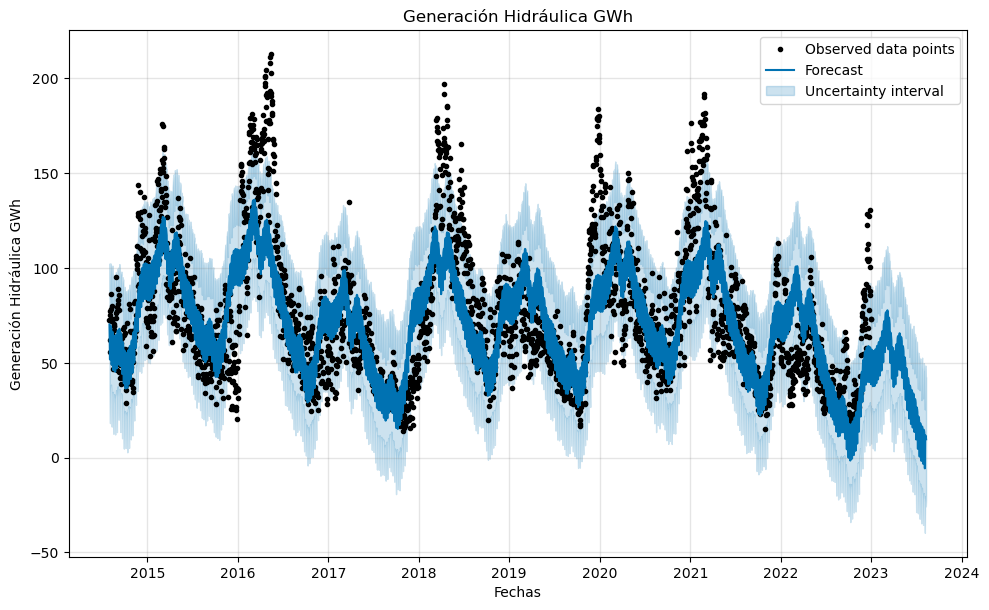

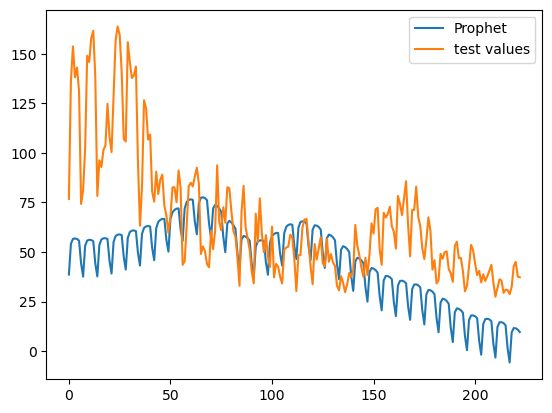

19:17:02 - cmdstanpy - INFO - Chain [1] start processing
19:17:03 - cmdstanpy - INFO - Chain [1] done processing


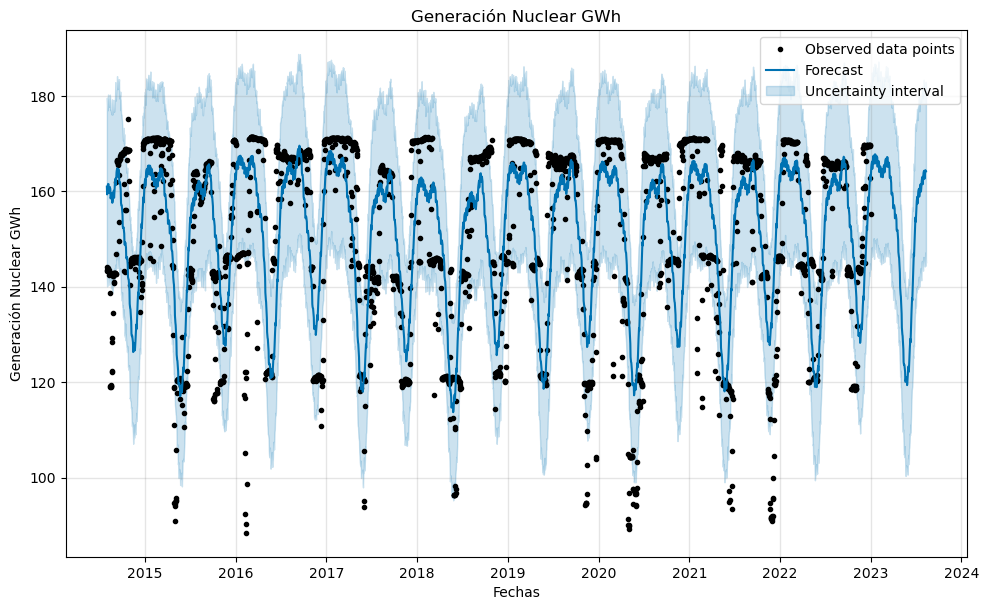

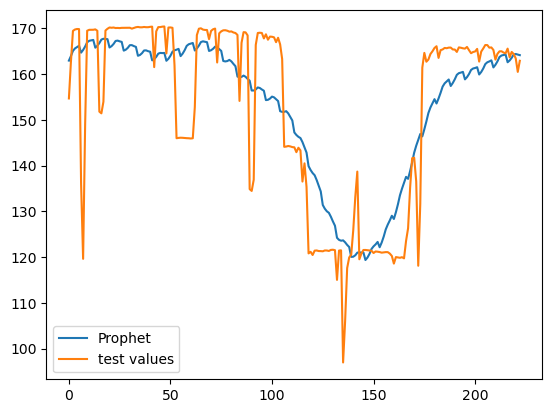

19:17:05 - cmdstanpy - INFO - Chain [1] start processing
19:17:05 - cmdstanpy - INFO - Chain [1] done processing


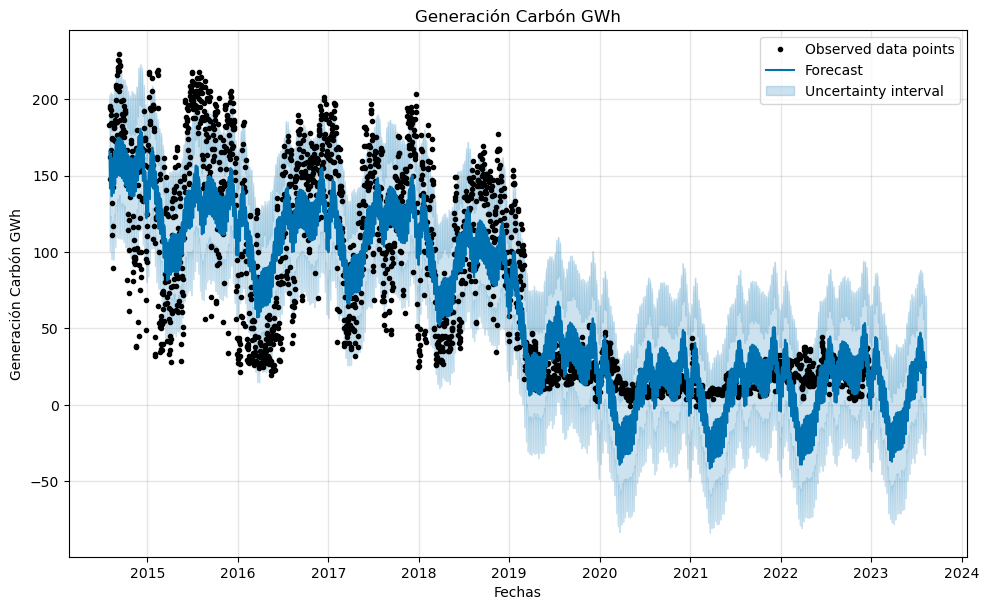

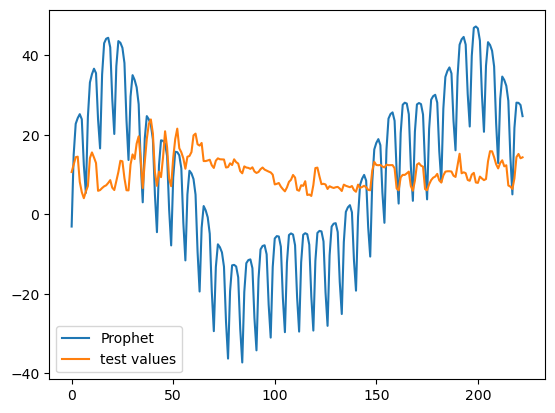

19:17:07 - cmdstanpy - INFO - Chain [1] start processing
19:17:09 - cmdstanpy - INFO - Chain [1] done processing


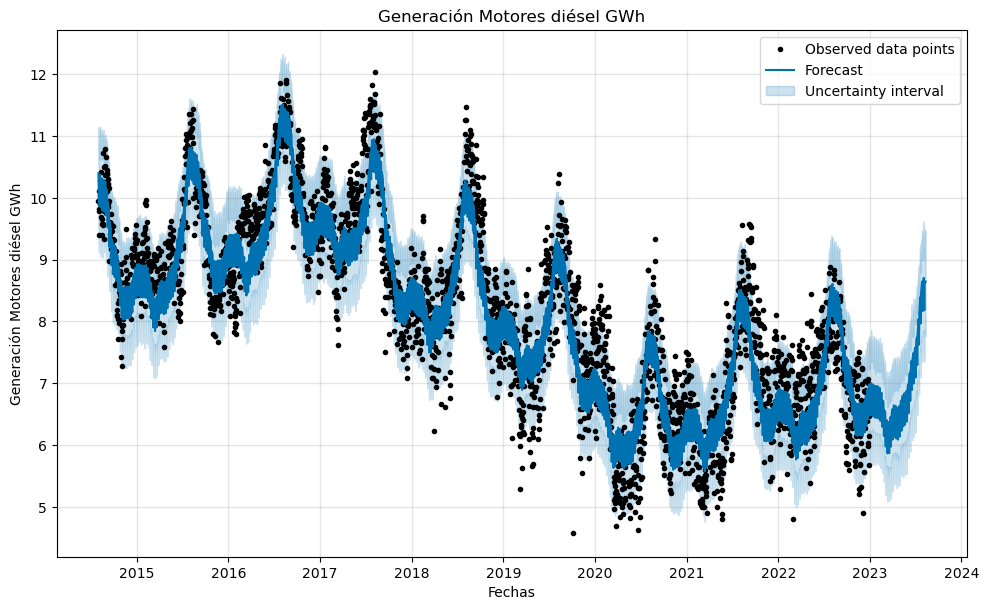

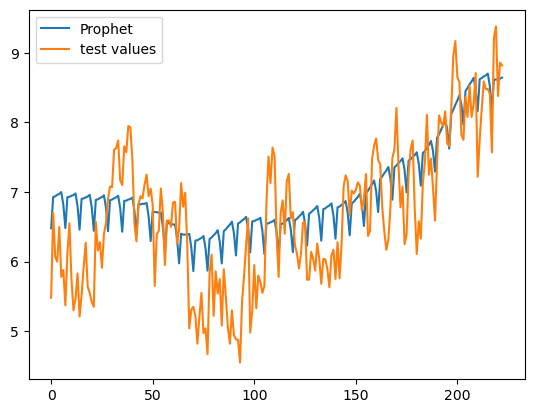

19:17:11 - cmdstanpy - INFO - Chain [1] start processing
19:17:12 - cmdstanpy - INFO - Chain [1] done processing


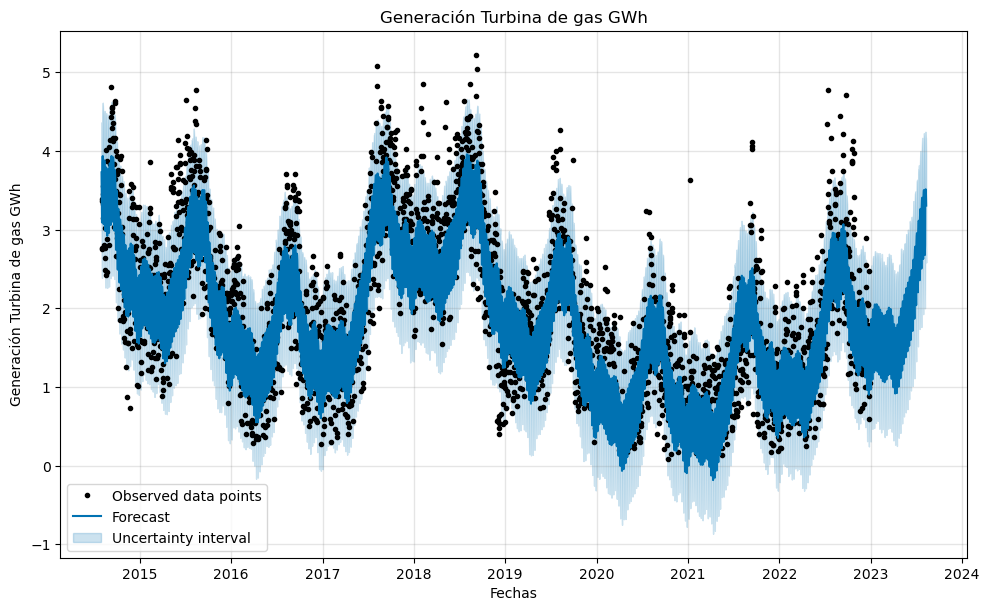

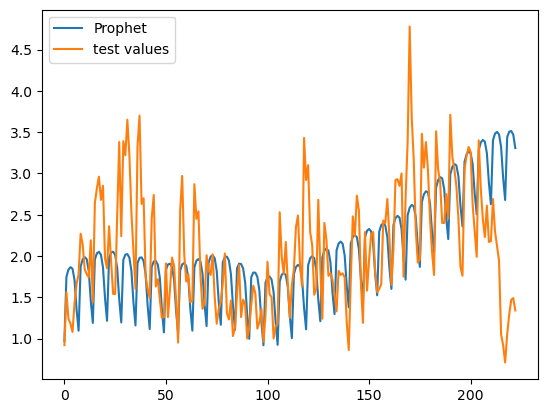

19:17:14 - cmdstanpy - INFO - Chain [1] start processing
19:17:15 - cmdstanpy - INFO - Chain [1] done processing


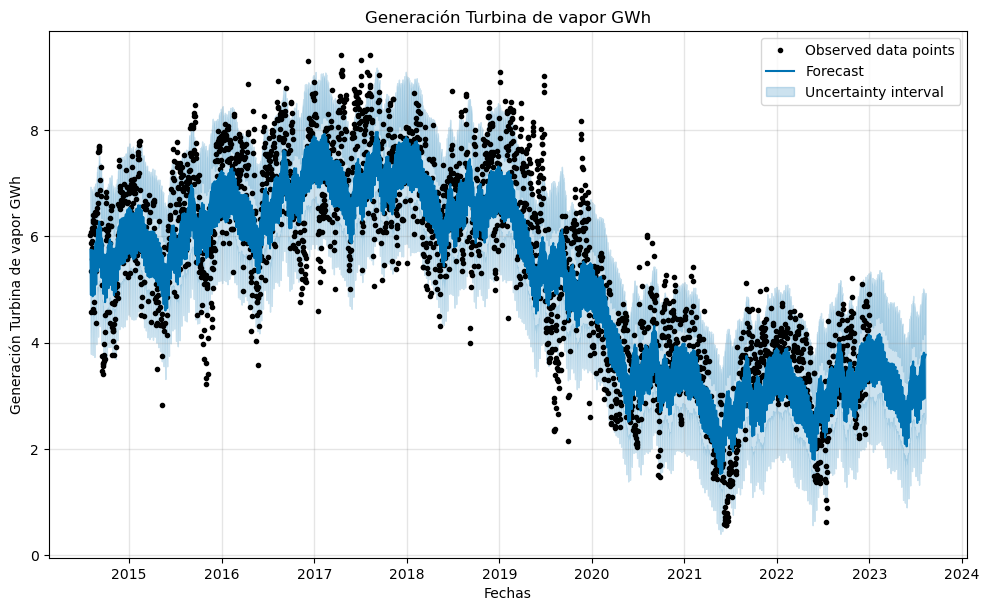

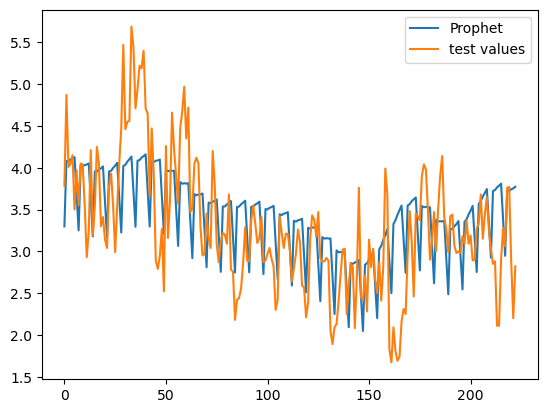

19:17:17 - cmdstanpy - INFO - Chain [1] start processing
19:17:18 - cmdstanpy - INFO - Chain [1] done processing


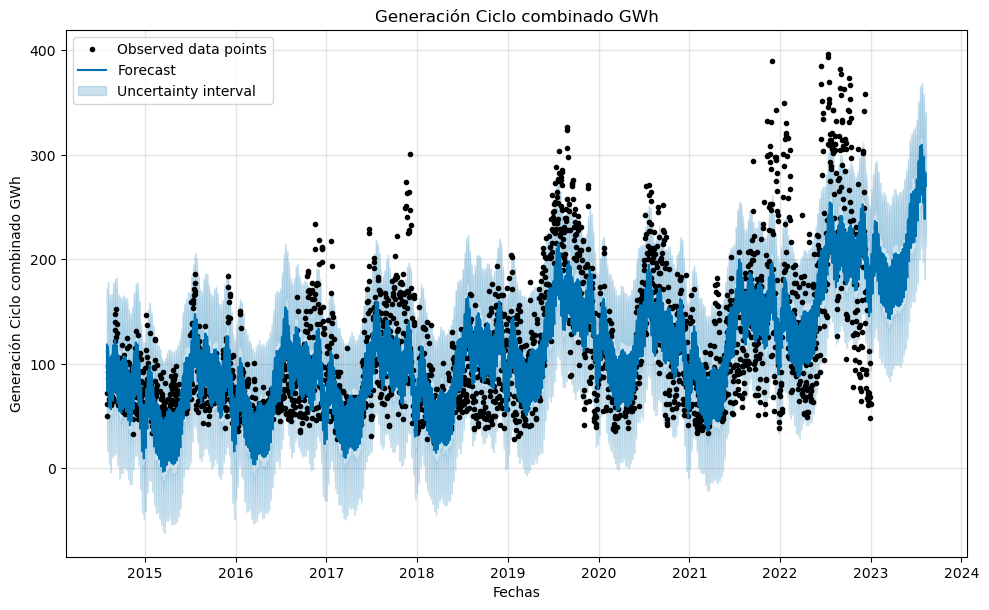

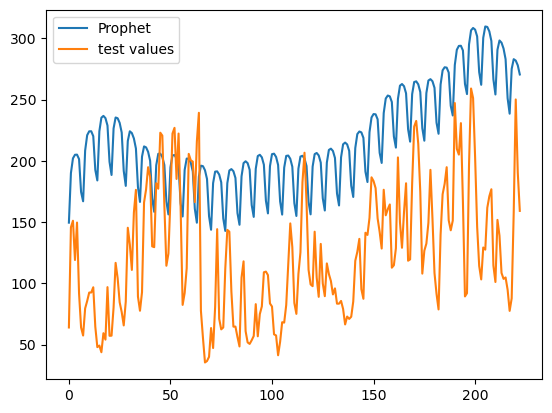

19:17:20 - cmdstanpy - INFO - Chain [1] start processing
19:17:20 - cmdstanpy - INFO - Chain [1] done processing


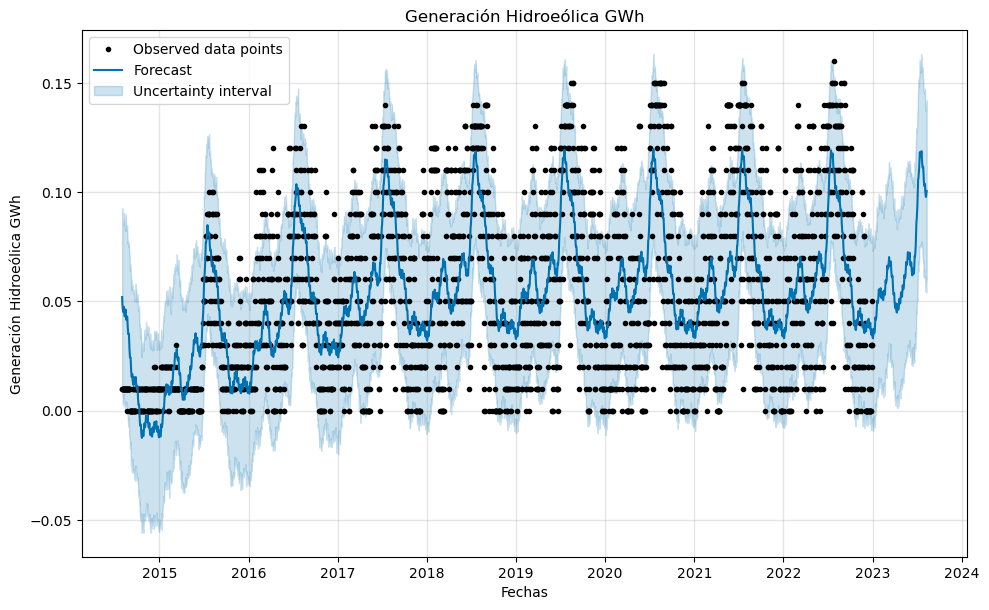

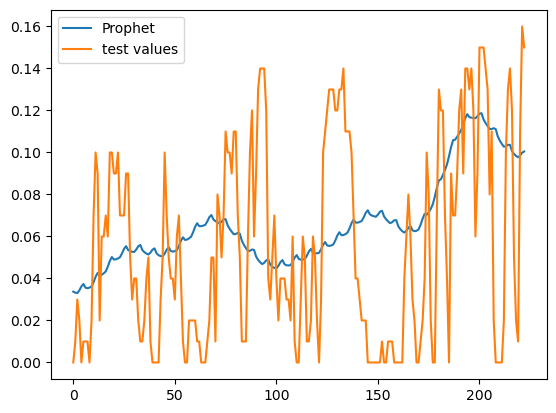

19:17:22 - cmdstanpy - INFO - Chain [1] start processing
19:17:23 - cmdstanpy - INFO - Chain [1] done processing


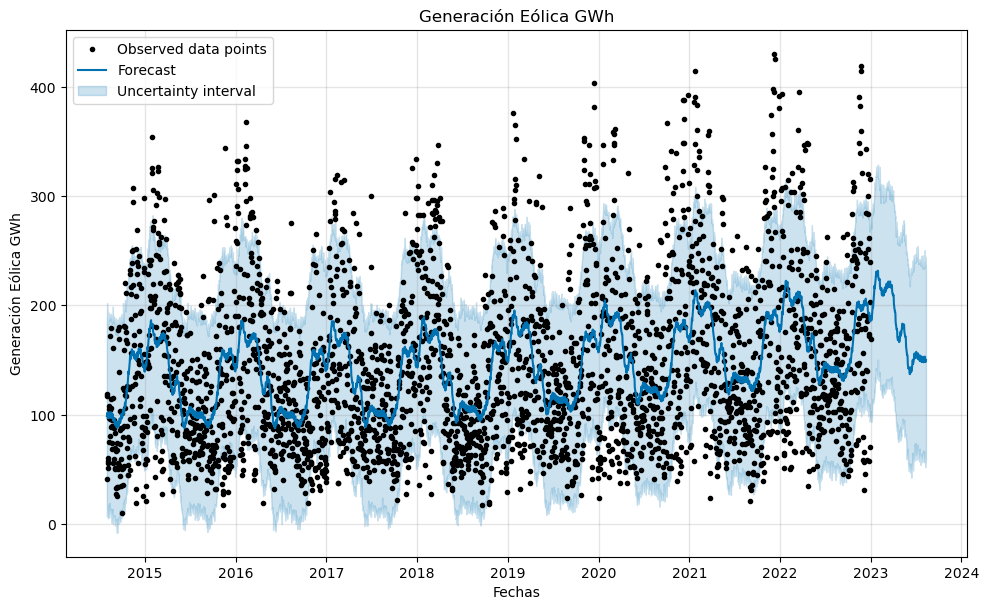

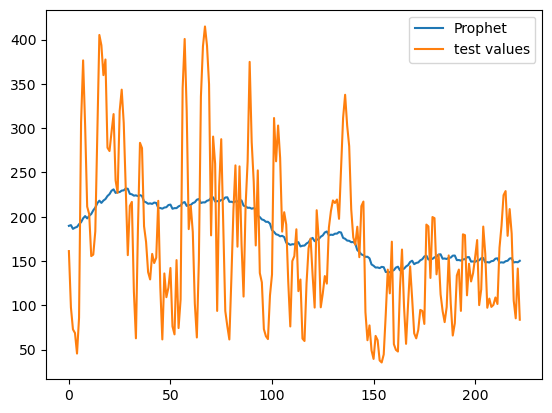

19:17:25 - cmdstanpy - INFO - Chain [1] start processing
19:17:25 - cmdstanpy - INFO - Chain [1] done processing


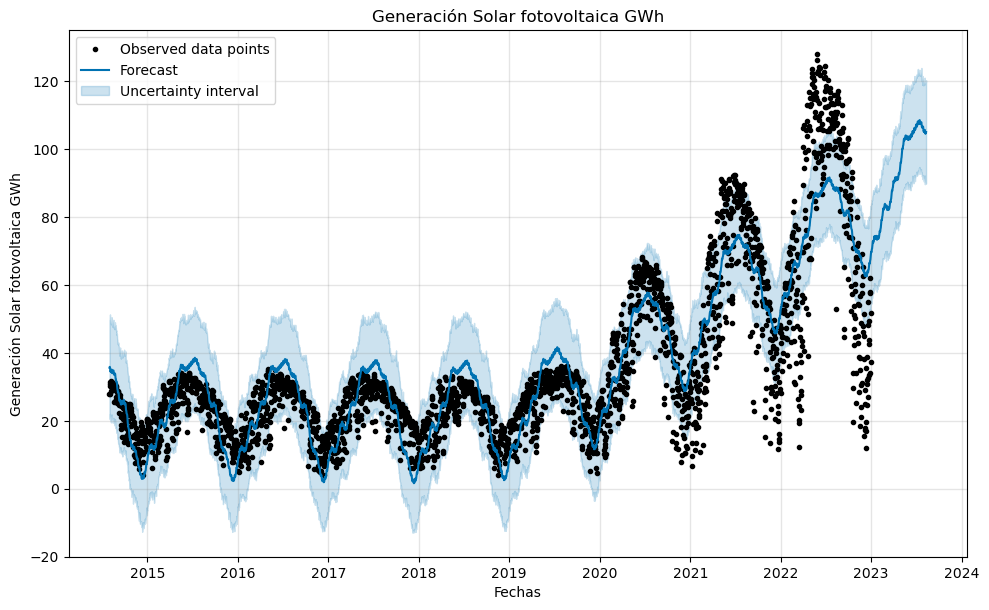

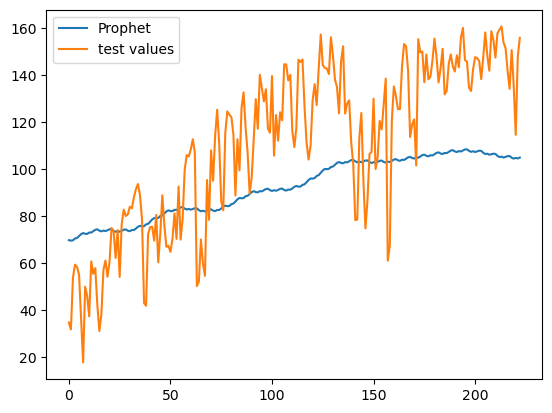

19:17:27 - cmdstanpy - INFO - Chain [1] start processing
19:17:28 - cmdstanpy - INFO - Chain [1] done processing


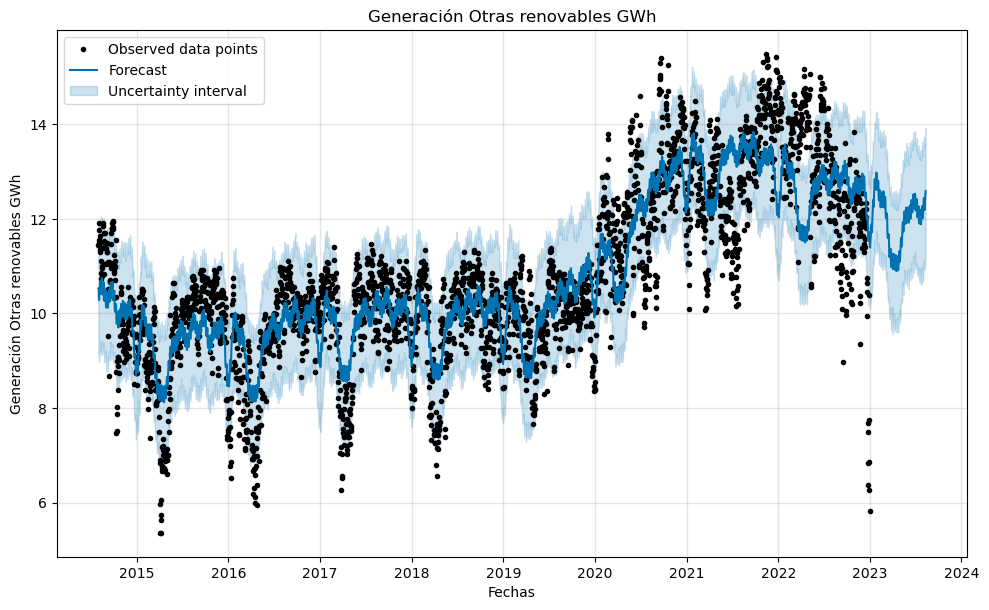

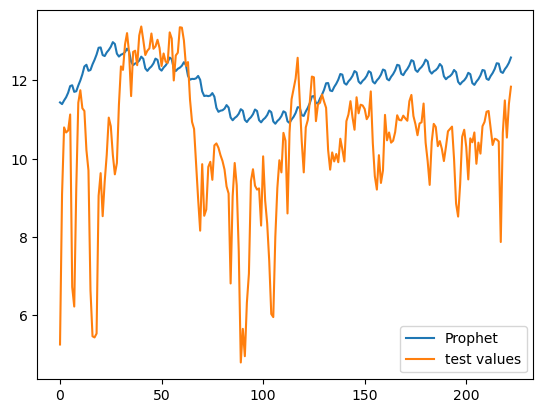

19:17:31 - cmdstanpy - INFO - Chain [1] start processing
19:17:31 - cmdstanpy - INFO - Chain [1] done processing


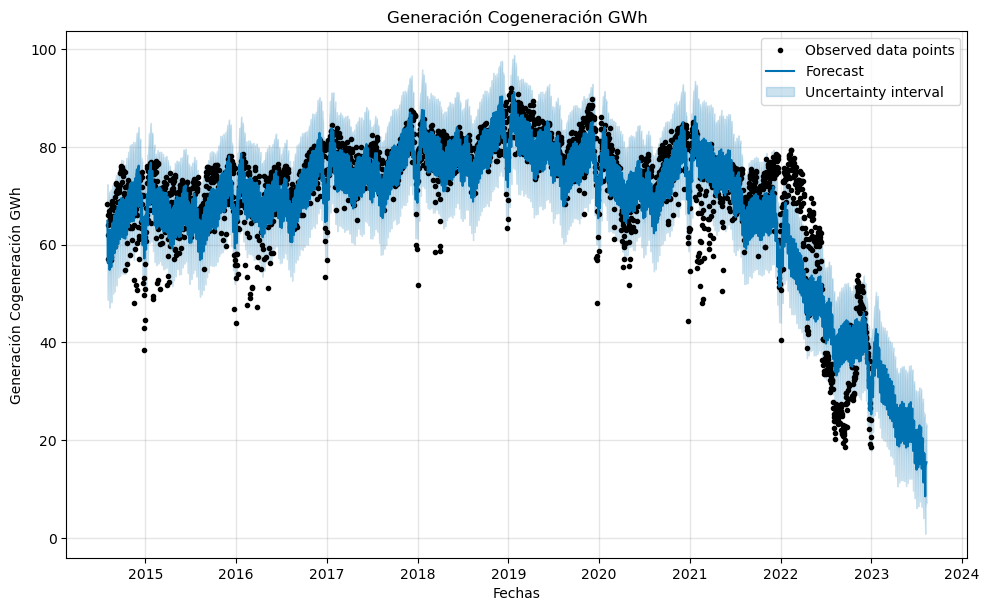

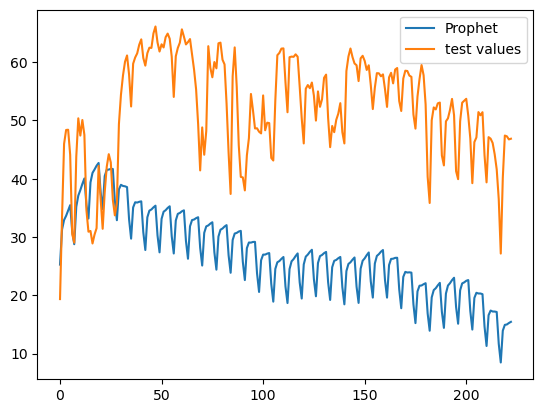

19:17:34 - cmdstanpy - INFO - Chain [1] start processing
19:17:34 - cmdstanpy - INFO - Chain [1] done processing


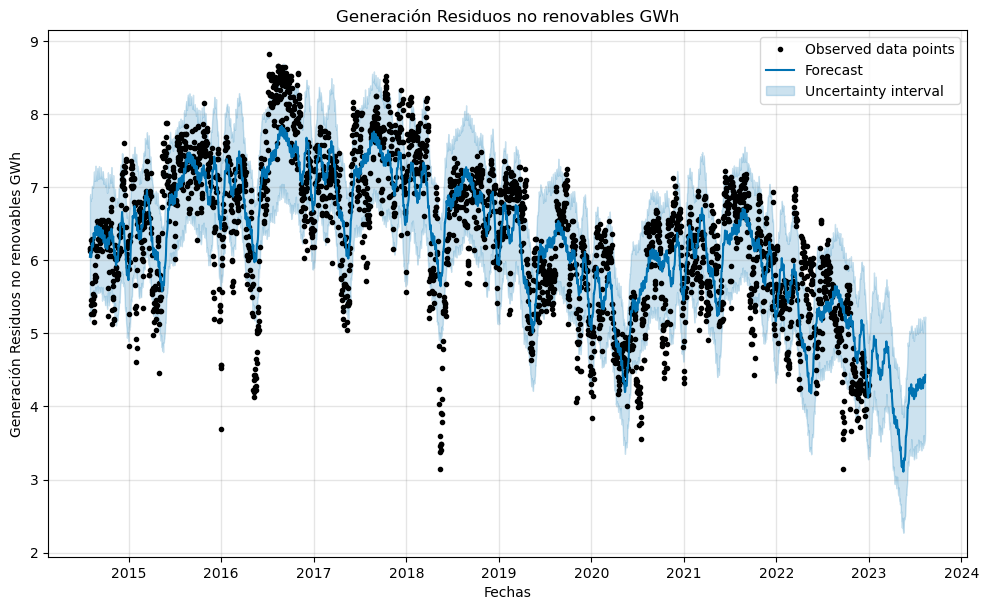

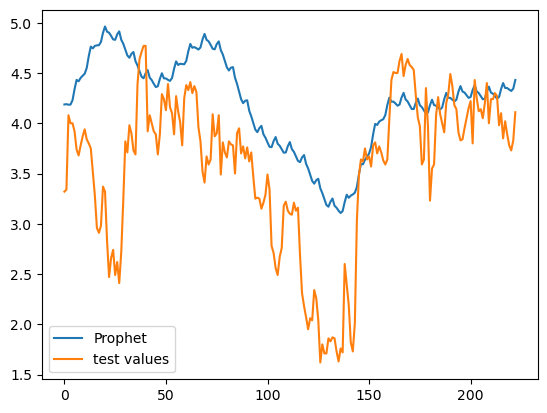

19:17:36 - cmdstanpy - INFO - Chain [1] start processing
19:17:37 - cmdstanpy - INFO - Chain [1] done processing


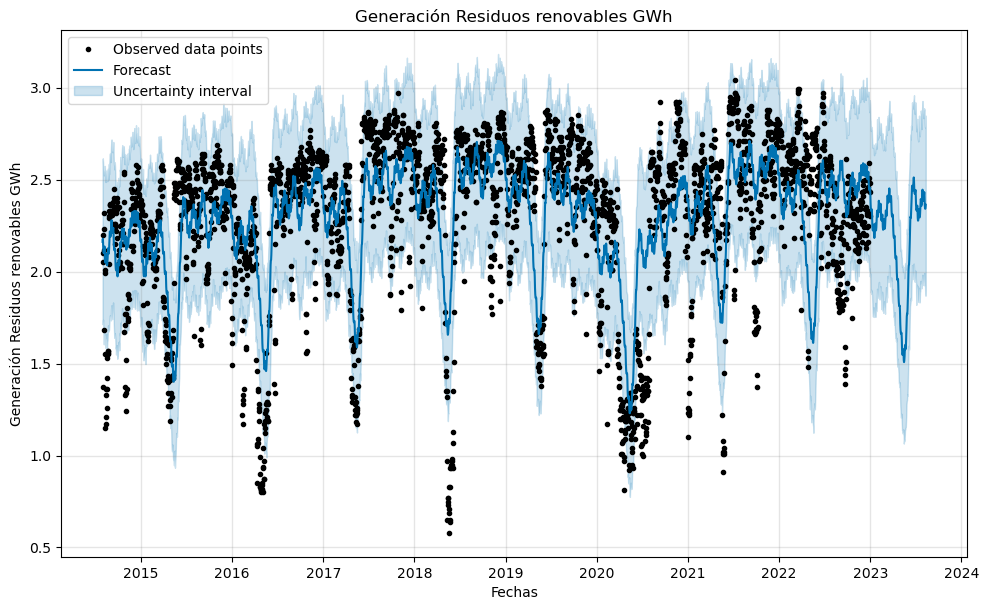

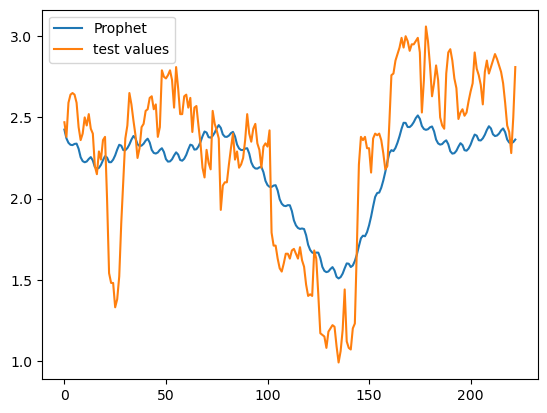

19:17:39 - cmdstanpy - INFO - Chain [1] start processing
19:17:39 - cmdstanpy - INFO - Chain [1] done processing


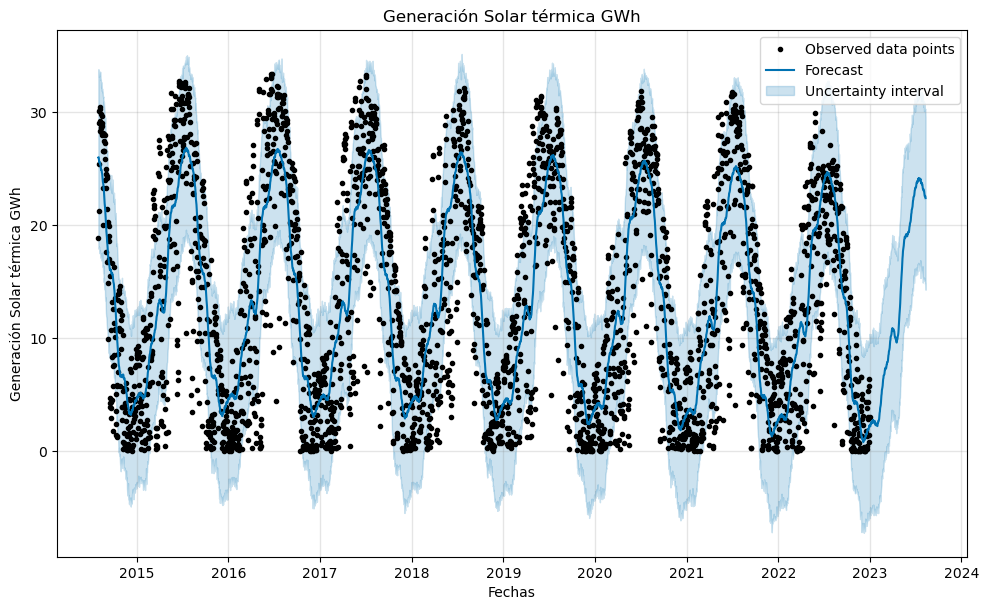

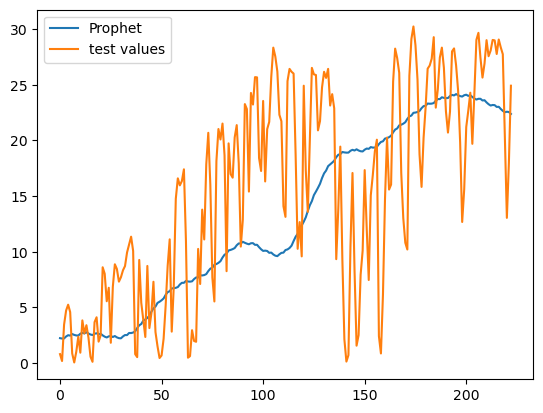

In [9]:
generacion_tech= pd.DataFrame(train_gen_x_tech["Fechas"])
generacion_tech = generacion_tech.rename(columns = {"Fechas":"ds"})

datos_modelos = list()

for tech in train_gen_x_tech.columns[1:]:
    
    generacion_tech["y"]=train_gen_x_tech.loc[:,tech]
    
    # Inicializamos un objeto Prophet y lo entrenamos con el dataframe.

    m = Prophet()
    m.fit(generacion_tech)
    
    # Extendemos el dataframe para un número concreto de días futuros

    future = m.make_future_dataframe(periods = 223)
    
    # EL método de predicción asigna un yhat a cada una de las fechas
    #Este método devuelve un dataframe con la predicción futura y la incertidumbre de dichos valores

    forecast = m.predict(future)
    
    # Graficamos las predicciones

    fig1 = m.plot(forecast)

    plt.xlabel("Fechas")
    plt.ylabel(f"{tech}")
    plt.title(f"{tech}")
    plt.legend()
    plt.savefig(f"Forecast Prophet - {tech}.png")
    plt.show()
    
    pred_prophet = forecast["yhat"][(-223):].reset_index(drop = True)
    target = test_gen_x_tech[tech].reset_index(drop = True)
    
    mae = mean_absolute_error(target, pred_prophet)
    mse = mean_squared_error(target, pred_prophet)
    r2 = r2_score(target, pred_prophet)
    
    datos_modelos.append([tech, m, mae, mse, r2])
    
    plt.plot(pred_prophet, label = "Prophet")
    plt.plot(target, label = "test values")
    plt.legend()
    plt.savefig(f"Validation Prophet - {tech}.png")
    plt.show()
    
df_modelos_gen_x_tech = pd.DataFrame(data = datos_modelos, columns = ["Nombre", "Modelo", "mae", "mse", "r2"])

In [10]:
df_modelos_gen_x_tech

Nombre  \
0               Generación Hidráulica GWh   
1                  Generación Nuclear GWh   
2                   Generación Carbón GWh   
3           Generación Motores diésel GWh   
4           Generación Turbina de gas GWh   
5         Generación Turbina de vapor GWh   
6          Generación Ciclo combinado GWh   
7              Generación Hidroeólica GWh   
8                   Generación Eólica GWh   
9       Generación Solar fotovoltaica GWh   
10        Generación Otras renovables GWh   
11            Generación Cogeneración GWh   
12  Generación Residuos no renovables GWh   
13     Generación Residuos renovables GWh   
14           Generación Solar térmica GWh   

                                               Modelo        mae  \
0   <prophet.forecaster.Prophet object at 0x000001...  27.943585   
1   <prophet.forecaster.Prophet object at 0x000001...   7.723505   
2   <prophet.forecaster.Prophet object at 0x000001...  17.484715   
3   <prophet.forecaster.Prophet object at 0x000001...   0.609118   
4   <prophet.forecaster.Prophet object at 0x000001...   0.517030   
5   <prophet.forecaster.Prophet object at 0x000001...   0.503816   
6   <prophet.forecaster.Prophet object at 0x000001...  95.992856   
7   <prophet.forecaster.Prophet object at 0x000001...   0.039102   
8   <prophet.forecaster.Prophet object at 0x000001...  65.539031   
9   <prophet.forecaster.Prophet object at 0x000001...  27.463145   
10  <prophet.forecaster.Prophet object at 0x000001...   1.699314   
11  <prophet.forecaster.Prophet object at 0x000001...  25.527479   
12  <prophet.forecaster.Prophet object at 0x000001...   0.689302   
13  <prophet.forecaster.Prophet object at 0x000001...   0.301346   
14  <prophet.forecaster.Prophet object at 0x000001...   6.068644   

             mse         r2  
0    1354.868245  -0.292752  
1     100.470457   0.747678  
2     423.613669 -28.743504  
3       0.542295   0.482796  
4       0.521924  -0.017797  
5       0.414662   0.282188  
6   11207.006834  -3.121147  
7       0.002149   0.022543  
8    6385.317801   0.186261  
9     992.204128   0.196809  
10      4.859124  -0.639565  
11    738.680394  -7.933010  
12      0.776438  -0.305589  
13      0.123965   0.537675  
14     58.257239   0.334748

In [11]:
df_modelos_gen_x_tech.to_csv("Generación por tecnología - PROPHET.csv", index = False)

Se puede ver en el Dataframe anterior que, a excepción del modelo de Generación Nuclear, todos tienen un r2 bastante bajo, por lo que no arrojarían estimaciones precisas de los datos. De este modo, se decide no trabajar con ninguno de ellos, puesto que seleccionar exclusivamente una de las tecnologías carece de sentido.

# Generación energías renovables vs no renovables

En segundo lugar, se cargan los datos de Generación Diaria en los que se comparan las energías renovables con las no renovables, y se procede de la misma manera que con el conjunto de datos del apartado anterior.

In [12]:
gen_ren_noren=pd.read_csv("GeneracionDiariaRenNoRen.csv")
gen_ren_noren.head(3)

Fechas  Generación Renovables GWh  Generación No renovables GWh
0  2014-08-01                     251.77                        499.57
1  2014-08-02                     242.18                        429.53
2  2014-08-03                     166.05                        450.89

In [13]:
gen_ren_noren["Fechas"] = gen_ren_noren["Fechas"].apply(lambda x : datetime.strptime(x,"%Y-%m-%d"))

train_gen_ren_noren = gen_ren_noren[:3075]

test_gen_ren_noren = gen_ren_noren[3075:]

gen_ren= pd.DataFrame(train_gen_ren_noren["Fechas"])
gen_ren = gen_ren.rename(columns = {"Fechas":"ds"})
gen_ren

ds
0    2014-08-01
1    2014-08-02
2    2014-08-03
3    2014-08-04
4    2014-08-05
...         ...
3070 2022-12-27
3071 2022-12-28
3072 2022-12-29
3073 2022-12-30
3074 2022-12-31

[3075 rows x 1 columns]

19:17:42 - cmdstanpy - INFO - Chain [1] start processing
19:17:42 - cmdstanpy - INFO - Chain [1] done processing


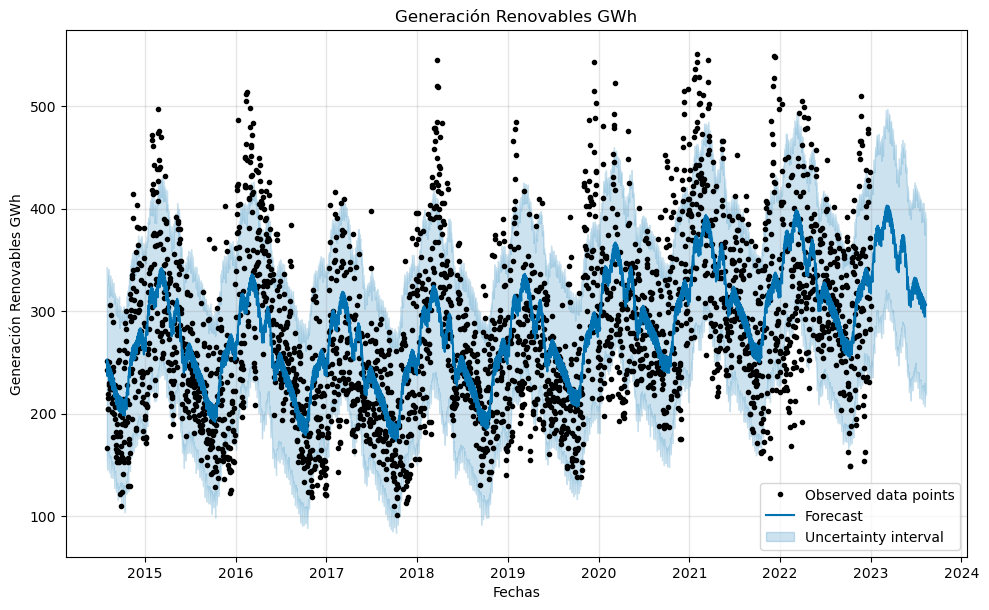

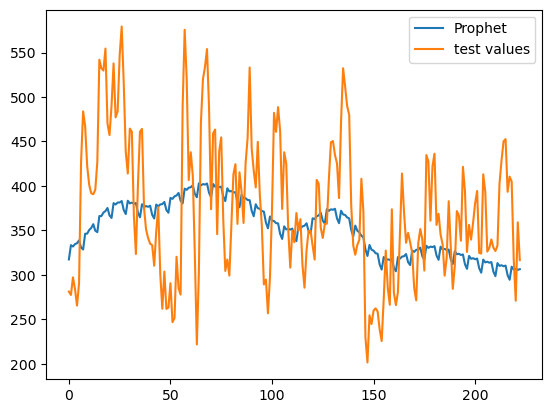

19:17:44 - cmdstanpy - INFO - Chain [1] start processing
19:17:45 - cmdstanpy - INFO - Chain [1] done processing


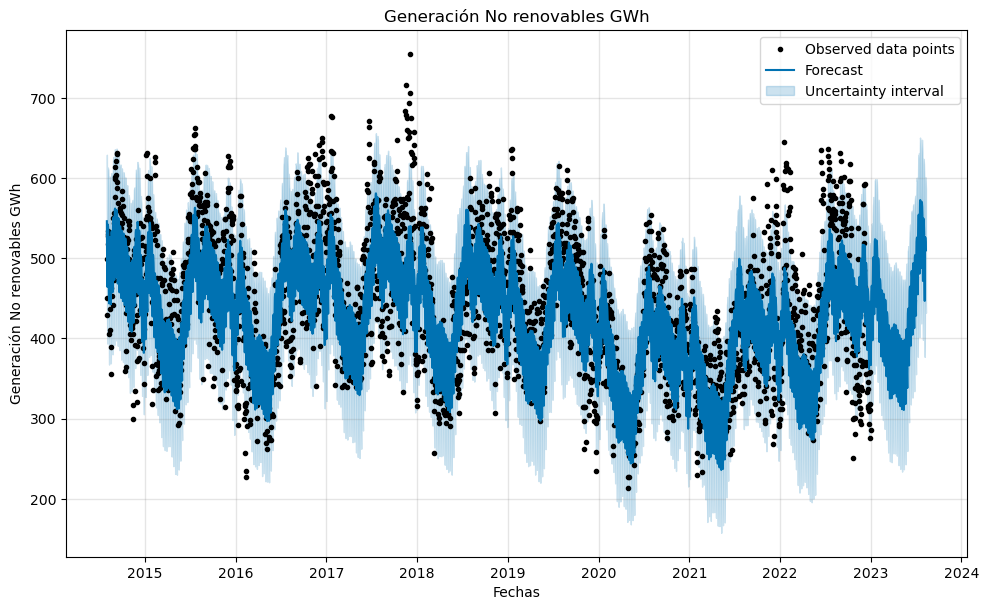

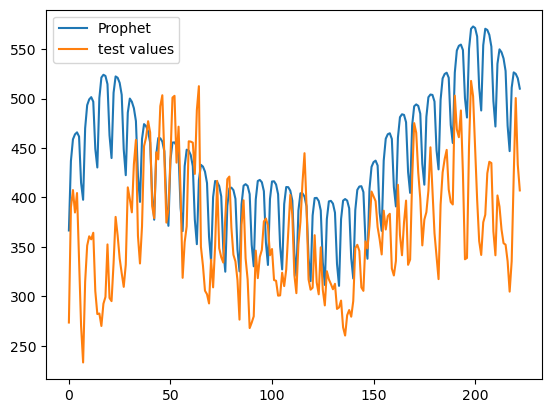

In [14]:
datos_modelos = list()

for tech in train_gen_ren_noren.columns[1:]:
    
    gen_ren["y"]=train_gen_ren_noren.loc[:,tech]
    
    # Inicializamos un objeto Prophet y lo entrenamos con el dataframe.

    m = Prophet()
    m.fit(gen_ren)
    
    # Extendemos el dataframe para un número concreto de días futuros

    future = m.make_future_dataframe(periods = 223)
    
    # EL método de predicción asigna un yhat a cada una de las fechas
    #Este método devuelve un dataframe con la predicción futura y la incertidumbre de dichos valores

    forecast = m.predict(future)
    
    # Graficamos las predicciones

    fig1 = m.plot(forecast)

    plt.xlabel("Fechas")
    plt.ylabel(f"{tech}")
    plt.title(f"{tech}")
    plt.legend()
    plt.savefig(f"Forecast Prophet - {tech}.png")
    plt.show()
    
    pred_prophet = forecast["yhat"][(-223):].reset_index(drop = True)
    target = test_gen_ren_noren[tech].reset_index(drop = True)
    
    mae = mean_absolute_error(target, pred_prophet)
    mse = mean_squared_error(target, pred_prophet)
    r2 = r2_score(target, pred_prophet)
    
    datos_modelos.append([tech, m, mae, mse, r2])
    
    plt.plot(pred_prophet, label = "Prophet")
    plt.plot(target, label = "test values")
    plt.legend()
    plt.savefig(f"Validation Prophet - {tech}.png")
    plt.show()
    
df_modelos_gen_ren_noren = pd.DataFrame(data = datos_modelos, columns = ["Nombre", "Modelo", "mae", "mse", "r2"])

In [15]:
df_modelos_gen_ren_noren

Nombre  \
0     Generación Renovables GWh   
1  Generación No renovables GWh   

                                              Modelo        mae          mse  \
0  <prophet.forecaster.Prophet object at 0x000001...  62.426824  5912.947492   
1  <prophet.forecaster.Prophet object at 0x000001...  79.367163  9070.650002   

         r2  
0  0.060378  
1 -1.531862

In [16]:
df_modelos_gen_ren_noren.to_csv("Generación renovable vs no renovable - PROPHET.csv", index = False)

De nuevo, los valores de r2 son demasiado bajos en ambos casos, por lo que no se selecciona este conjunto de datos para diseñar modelo alguno de predicción.

# Emisiones por tecnología


En tercer lugar, se cargan los datos de Emisiones Diarias por Tecnología. Al igual que en los dos casos anteriores, las predicciones con respecto a los valores reales no son buenas, por lo que se descarta continuar con el diseño de los modelos.

In [17]:
emisiones_diarias=pd.read_csv("EmisionesDiarias.csv")
emisiones_diarias.head(3)
emisiones_diarias.drop("tCO2 eq./MWh", axis = 1, inplace = True)

In [18]:
emisiones_diarias["Fechas"] = emisiones_diarias["Fechas"].apply(lambda x : datetime.strptime(x,"%Y-%m-%d"))

train_emisiones = emisiones_diarias[:3075]

test_emisiones = emisiones_diarias[3075:]

emisiones= pd.DataFrame(train_emisiones["Fechas"])
emisiones = train_emisiones.rename(columns = {"Fechas":"ds"})
emisiones

ds  Emisiones Motores diésel  Emisiones Turbina de gas  \
0    2014-08-01                   7921.88                   2236.33   
1    2014-08-02                   7784.07                   1678.06   
2    2014-08-03                   7483.51                   1665.99   
3    2014-08-04                   8053.26                   2235.35   
4    2014-08-05                   7837.00                   2214.94   
...         ...                       ...                       ...   
3070 2022-12-27                   3906.46                   2785.91   
3071 2022-12-28                   4222.16                   1175.28   
3072 2022-12-29                   4440.03                   1403.86   
3073 2022-12-30                   4552.54                   1791.06   
3074 2022-12-31                   4498.52                   1624.67   

      Emisiones Turbina de vapor  Emisiones Ciclo combinado  \
0                        5361.02                   30352.01   
1                        4751.97                   22092.77   
2                        4079.90                   26182.17   
3                        5407.29                   35543.03   
4                        5232.38                   37612.21   
...                          ...                        ...   
3070                     2963.33                   39680.11   
3071                     3030.35                   27833.57   
3072                     3914.73                   25805.19   
3073                     4430.22                   20709.22   
3074                     4084.11                   25750.63   

      Emisiones Cogeneración  Emisiones Residuos no renovables  \
0                   25975.34                           1475.83   
1                   23523.61                           1471.15   
2                   21659.56                           1478.46   
3                   24336.56                           1309.36   
4                   25107.16                           1262.29   
...                      ...                               ...   
3070                13633.01                           1077.23   
3071                10252.76                           1024.32   
3072                 8902.63                            997.12   
3073                 7623.44                           1003.42   
3074                 6855.96                           1029.05   

      Total tCO2 eq.  Emisiones Carbón  
0          247145.18         173822.78  
1          201704.57         140402.94  
2          216905.44         154355.84  
3          261151.06         184266.22  
4          264824.36         185558.37  
...              ...               ...  
3070        77850.69          13804.64  
3071        55207.43           7669.00  
3072        52977.28           7513.73  
3073        47682.44           7572.53  
3074        50315.71           6472.77  

[3075 rows x 9 columns]

19:17:48 - cmdstanpy - INFO - Chain [1] start processing
19:17:49 - cmdstanpy - INFO - Chain [1] done processing


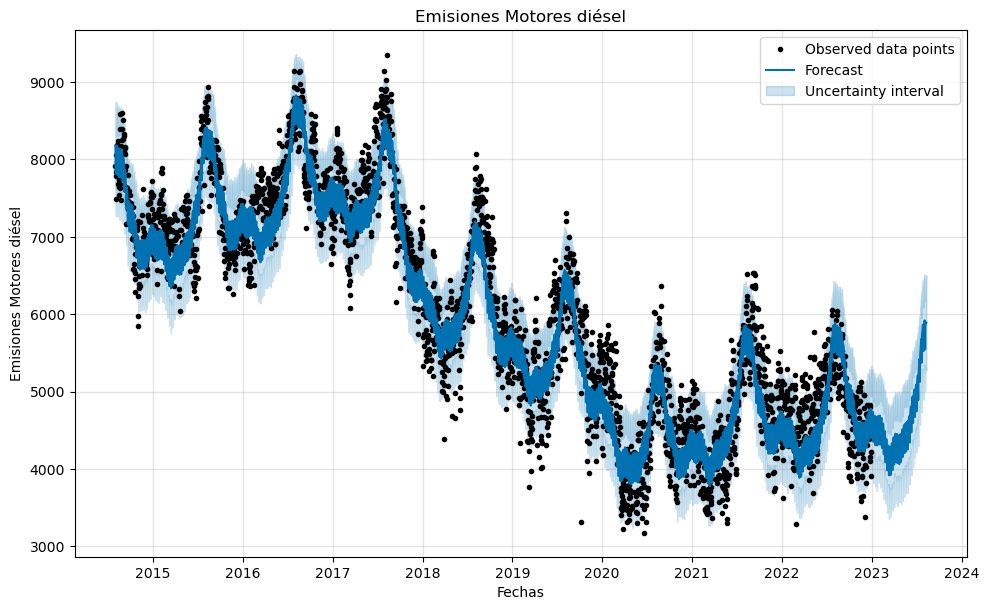

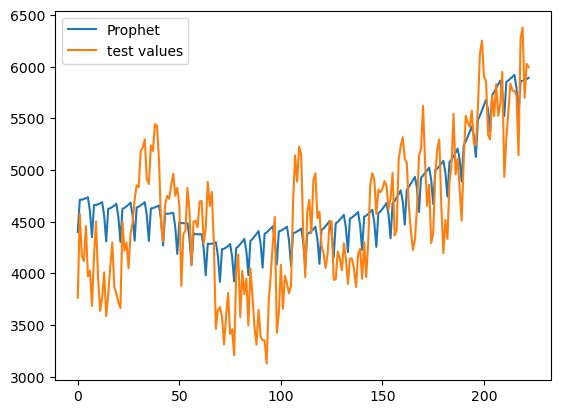

19:17:51 - cmdstanpy - INFO - Chain [1] start processing
19:17:52 - cmdstanpy - INFO - Chain [1] done processing


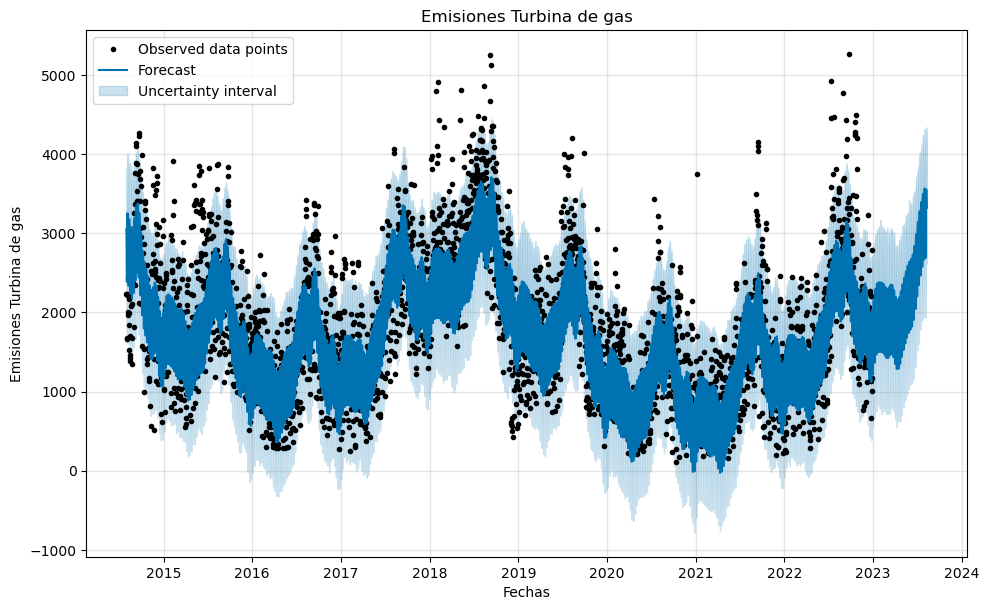

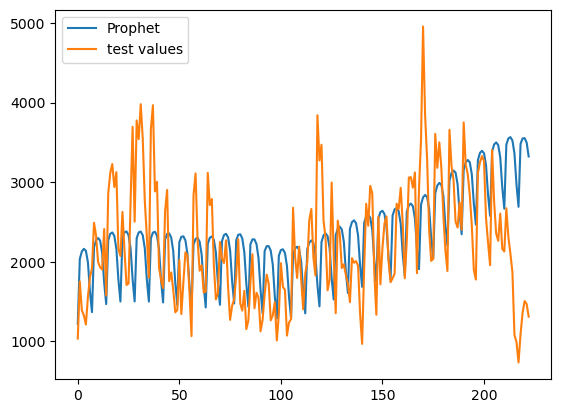

19:17:54 - cmdstanpy - INFO - Chain [1] start processing
19:17:54 - cmdstanpy - INFO - Chain [1] done processing


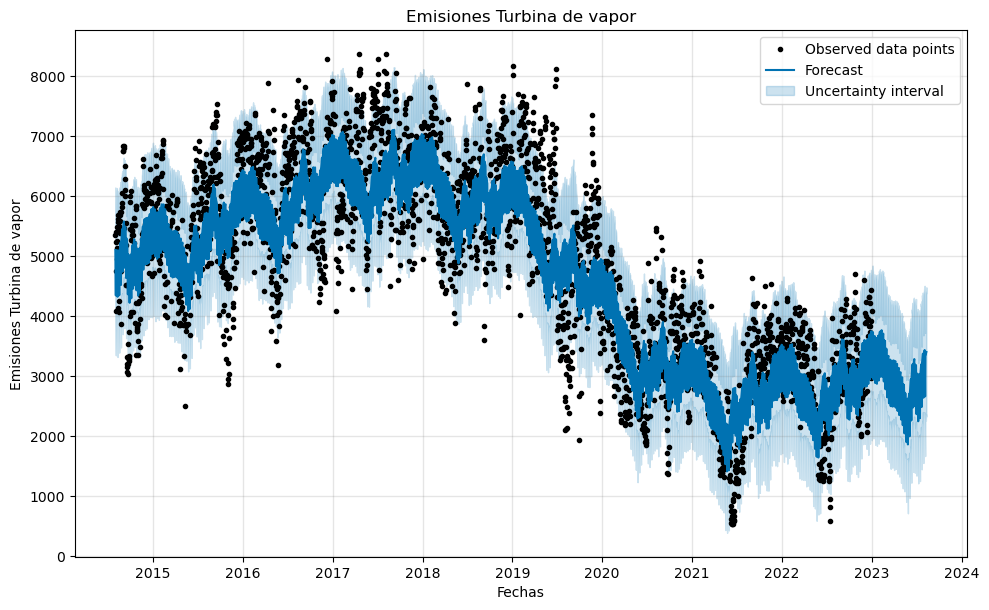

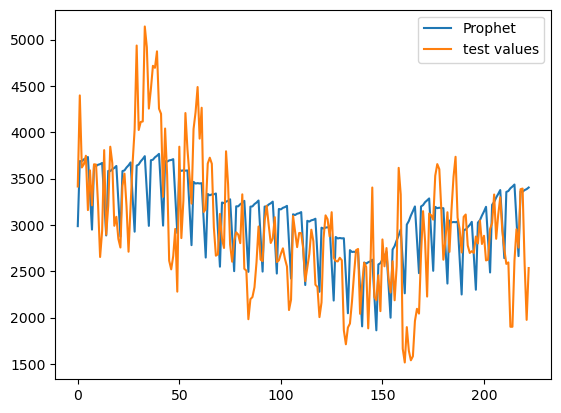

19:17:57 - cmdstanpy - INFO - Chain [1] start processing
19:17:57 - cmdstanpy - INFO - Chain [1] done processing


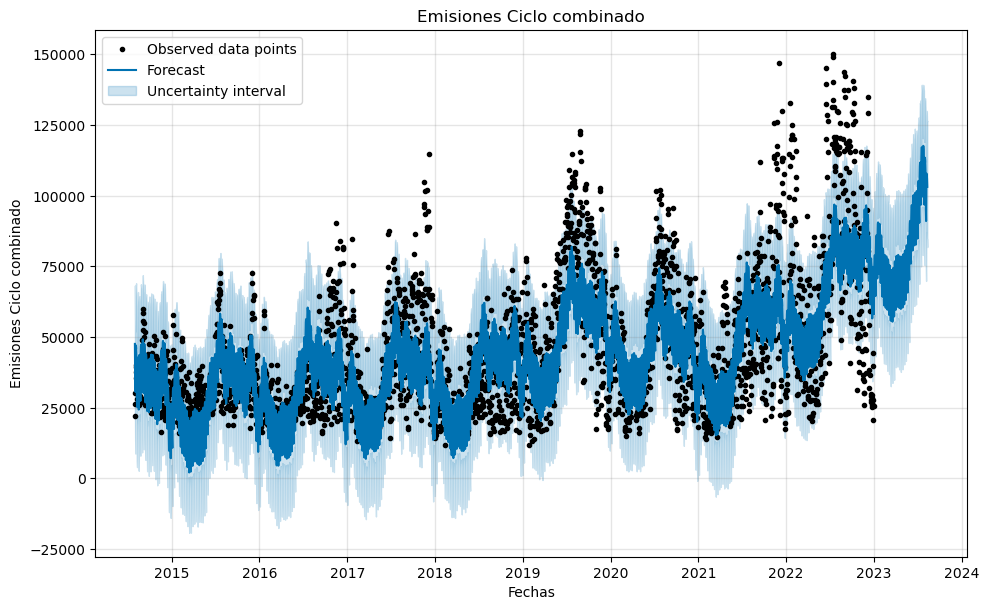

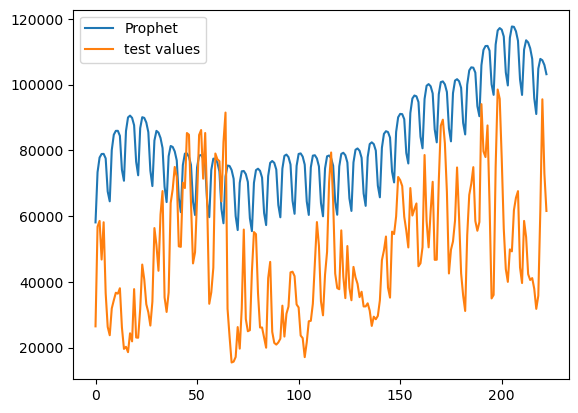

19:17:59 - cmdstanpy - INFO - Chain [1] start processing
19:18:00 - cmdstanpy - INFO - Chain [1] done processing


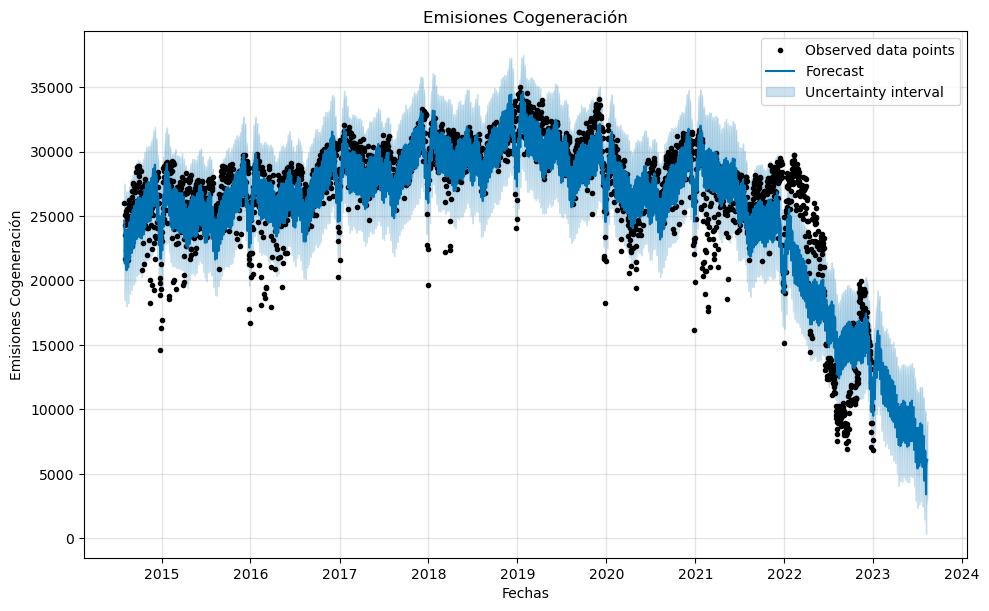

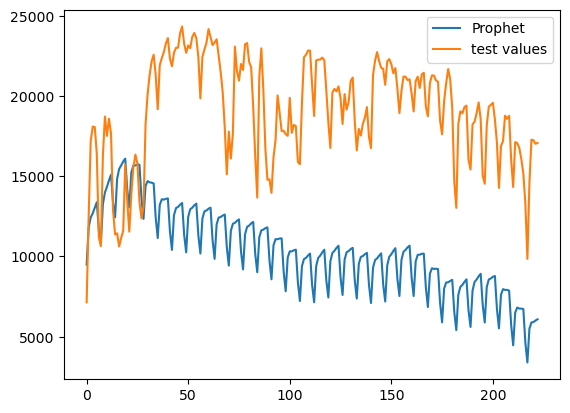

19:18:03 - cmdstanpy - INFO - Chain [1] start processing
19:18:04 - cmdstanpy - INFO - Chain [1] done processing


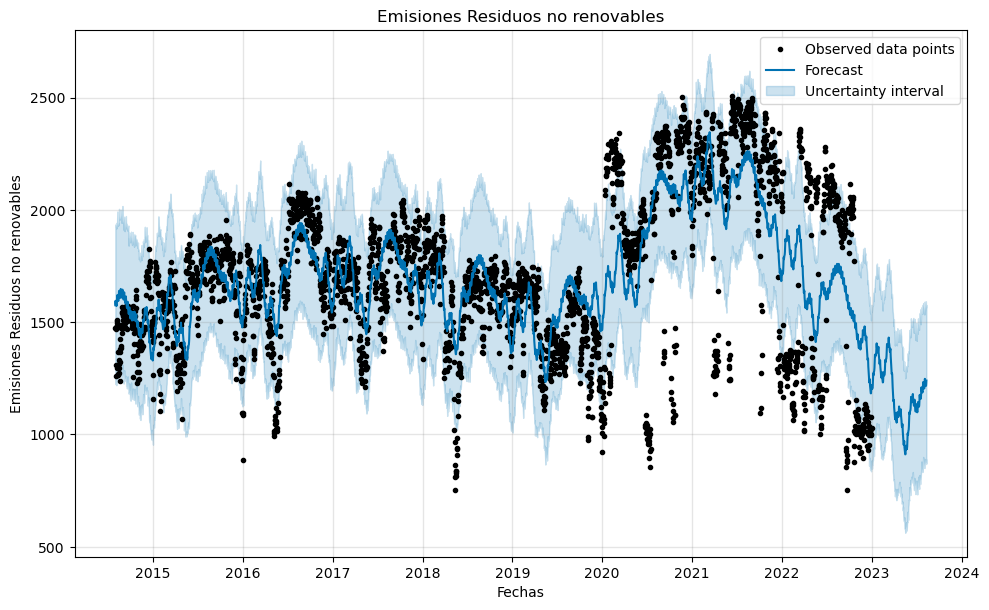

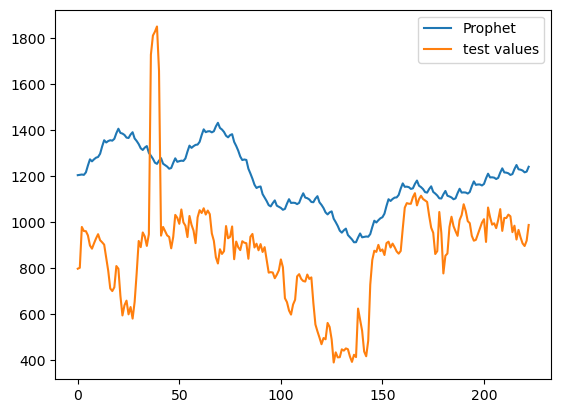

19:18:06 - cmdstanpy - INFO - Chain [1] start processing
19:18:06 - cmdstanpy - INFO - Chain [1] done processing


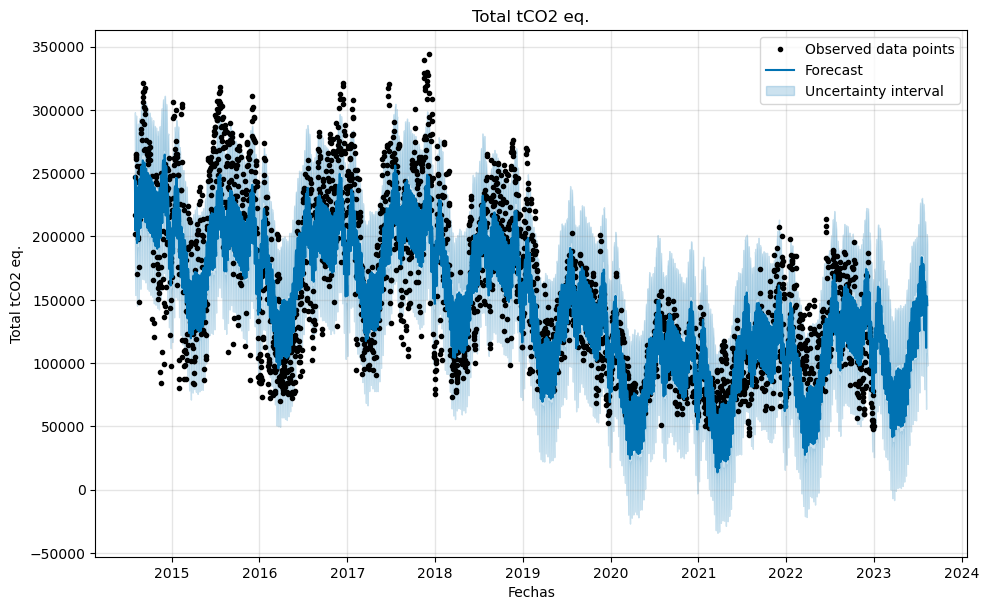

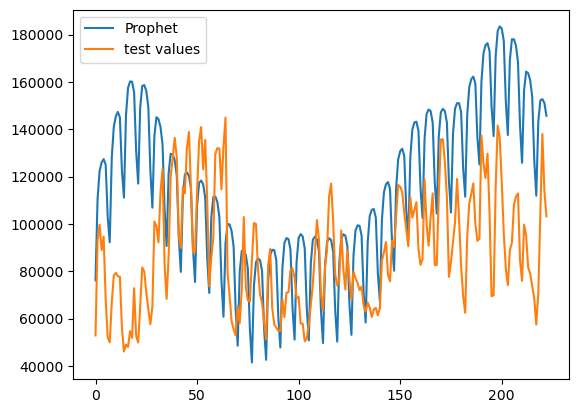

19:18:09 - cmdstanpy - INFO - Chain [1] start processing
19:18:09 - cmdstanpy - INFO - Chain [1] done processing


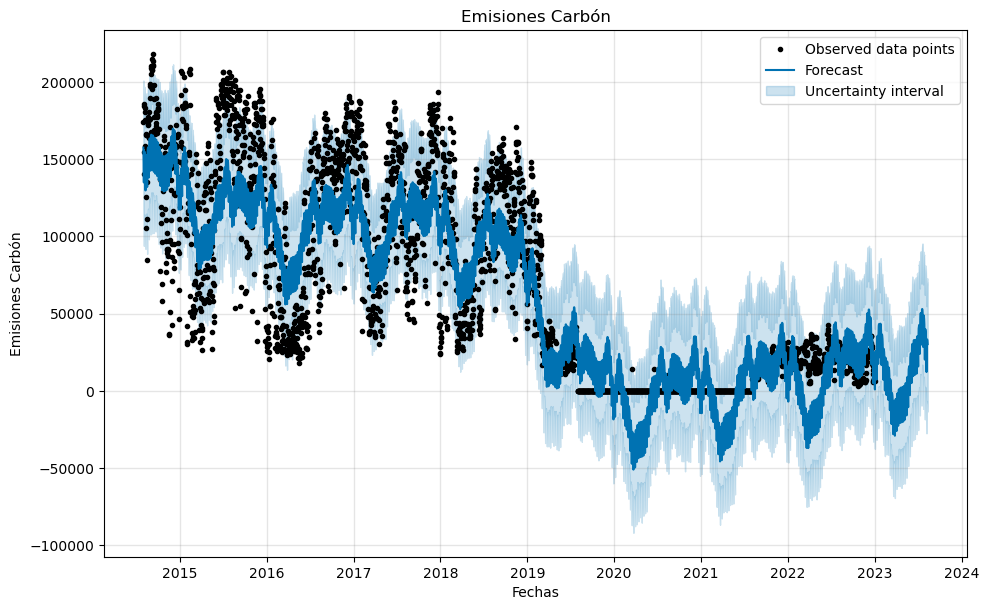

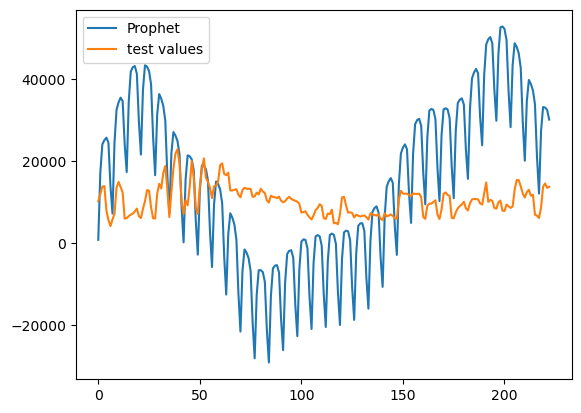

In [19]:
datos_modelos = list()

for tech in train_emisiones.columns[1:]:
    
    emisiones["y"]=train_emisiones.loc[:,tech]
    
    # Inicializamos un objeto Prophet y lo entrenamos con el dataframe.

    m = Prophet()
    m.fit(emisiones)
    
    # Extendemos el dataframe para un número concreto de días futuros

    future = m.make_future_dataframe(periods = 223)
    
    # EL método de predicción asigna un yhat a cada una de las fechas
    #Este método devuelve un dataframe con la predicción futura y la incertidumbre de dichos valores

    forecast = m.predict(future)
    
    # Graficamos las predicciones

    fig1 = m.plot(forecast)

    plt.xlabel("Fechas")
    plt.ylabel(f"{tech}")
    plt.title(f"{tech}")
    plt.legend()
    plt.savefig(f"Forecast Prophet - {tech}.png")
    plt.show()
    
    pred_prophet = forecast["yhat"][(-223):].reset_index(drop = True)
    target = test_emisiones[tech].reset_index(drop = True)
    
    mae = mean_absolute_error(target, pred_prophet)
    mse = mean_squared_error(target, pred_prophet)
    r2 = r2_score(target, pred_prophet)
    
    datos_modelos.append([tech, m, mae, mse, r2])
    
    plt.plot(pred_prophet, label = "Prophet")
    plt.plot(target, label = "test values")
    plt.legend()
    plt.savefig(f"Validation Prophet - {tech}.png")
    plt.show()
    
df_modelos_emisiones = pd.DataFrame(data = datos_modelos, columns = ["Nombre", "Modelo", "mae", "mse", "r2"])

In [20]:
df_modelos_emisiones

Nombre  \
0          Emisiones Motores diésel   
1          Emisiones Turbina de gas   
2        Emisiones Turbina de vapor   
3         Emisiones Ciclo combinado   
4            Emisiones Cogeneración   
5  Emisiones Residuos no renovables   
6                    Total tCO2 eq.   
7                  Emisiones Carbón   

                                              Modelo           mae  \
0  <prophet.forecaster.Prophet object at 0x000001...    393.129760   
1  <prophet.forecaster.Prophet object at 0x000001...    558.601824   
2  <prophet.forecaster.Prophet object at 0x000001...    452.445113   
3  <prophet.forecaster.Prophet object at 0x000001...  35895.608145   
4  <prophet.forecaster.Prophet object at 0x000001...   8974.937862   
5  <prophet.forecaster.Prophet object at 0x000001...    336.868257   
6  <prophet.forecaster.Prophet object at 0x000001...  33737.352489   
7  <prophet.forecaster.Prophet object at 0x000001...  16619.251909   

            mse         r2  
0  2.184279e+05   0.542125  
1  5.600380e+05  -0.024670  
2  3.350572e+05   0.284415  
3  1.568403e+09  -3.118975  
4  9.118294e+07  -7.215952  
5  1.421091e+05  -1.756722  
6  1.754299e+09  -1.980072  
7  3.932963e+08 -30.047015

In [21]:
df_modelos_emisiones.to_csv("Emisiones por Tecnología - PROPHET.csv", index = False)

# Demanda nacional

Por último, se carga el DataFrame con los datos de la Demanda Nacional.

In [22]:
demanda_nacional=pd.read_csv("demanda_nacional.csv")
demanda_nacional

Fecha  Energia Consumida Mw/h
0     2011-01-01                  605.99
1     2011-01-02                  641.86
2     2011-01-03                  801.30
3     2011-01-04                  833.25
4     2011-01-05                  803.48
...          ...                     ...
4611  2023-08-17                  705.51
4612  2023-08-18                  706.09
4613  2023-08-19                  664.26
4614  2023-08-20                  648.87
4615  2023-08-21                  741.41

[4616 rows x 2 columns]

In [23]:
demanda_nacional["Fecha"] = demanda_nacional["Fecha"].apply(lambda x : datetime.strptime(x,"%Y-%m-%d"))

train_demanda = demanda_nacional[:4383]

test_demanda = demanda_nacional[4383:]

train_demanda = train_demanda.rename(columns = {"Fecha":"ds", "Energia Consumida Mw/h":"y"})

19:18:12 - cmdstanpy - INFO - Chain [1] start processing
19:18:12 - cmdstanpy - INFO - Chain [1] done processing


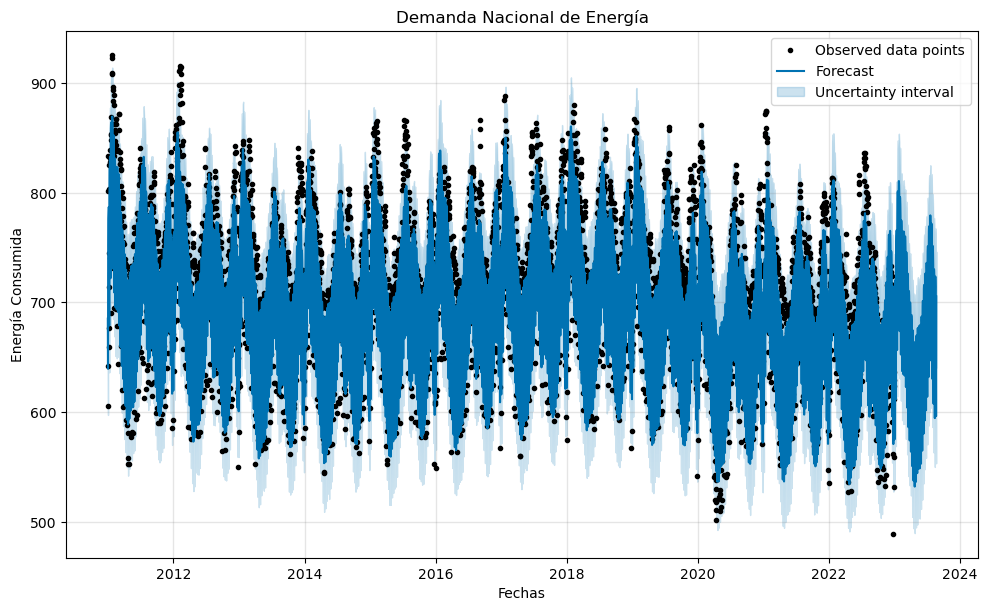

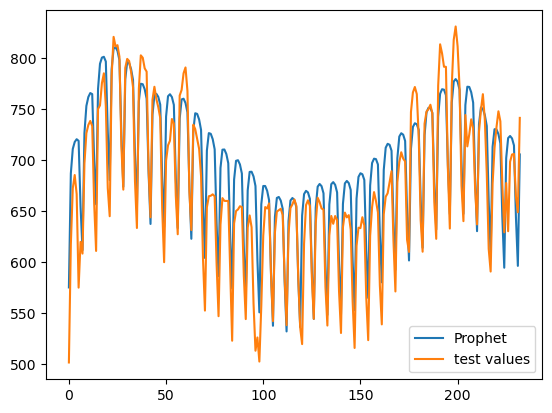

In [24]:
# Inicializamos un objeto Prophet y lo entrenamos con el dataframe.

m = Prophet()
m.fit(train_demanda)
    
# Extendemos el dataframe para un número concreto de días futuros

future = m.make_future_dataframe(periods = 233)
    
# EL método de predicción asigna un yhat a cada una de las fechas
#Este método devuelve un dataframe con la predicción futura y la incertidumbre de dichos valores

forecast = m.predict(future)
    
# Graficamos las predicciones
fig1 = m.plot(forecast)

plt.xlabel("Fechas")
plt.ylabel("Energía Consumida")
plt.title("Demanda Nacional de Energía")
plt.legend()
plt.savefig(f"Forecast Prophet - Demanda Nacional.png")
plt.show()

pred_prophet = forecast["yhat"][(-233):].reset_index(drop = True)
target = test_demanda["Energia Consumida Mw/h"].reset_index(drop = True)
    
mae = mean_absolute_error(target, pred_prophet)
mse = mean_squared_error(target, pred_prophet)
r2 = r2_score(target, pred_prophet)
    
plt.plot(pred_prophet, label = "Prophet")
plt.plot(target, label = "test values")
plt.legend()
plt.savefig(f"Validation Prophet - Demanda Nacional.png")
plt.show()
    
df_modelos_demanda_nacional = pd.DataFrame(data = [["Demanda", m, mae, mse, r2]], columns = ["Nombre", "Modelo", "mae", "mse", "r2"])

In [25]:
df_modelos_demanda_nacional

Nombre                                             Modelo       mae  \
0  Demanda  <prophet.forecaster.Prophet object at 0x000001...  28.76929   

           mse        r2  
0  1377.347517  0.757839

In [26]:
df_modelos_demanda_nacional.to_csv("Demanda nacional - PROPHET.csv", index = False)

En este caso, el valor de r2 es relativamente alto, por lo que se decide trabajar sobre el modelo, alterando algunos de los parámetros del mismo para intentar conseguir unas métricas mejores.

# Demanda por comunidades

Como de la demanda energética por comunidades sólo se pueden obtener valores mensuales, el conjunto es demasiado pequeño como para desarrollar modelos de predicción buenos.

In [27]:
# dem_x_com=pd.read_csv("demanda_comunidades.csv")
# dem_x_com=dem_x_com.dropna()

In [28]:
# dem_x_com

In [29]:
# dem_x_com["Fecha"] = dem_x_com["Fecha"].apply(lambda x : str(x))
# dem_x_com["Fecha"] = dem_x_com["Fecha"].apply(lambda x : datetime.strptime(x,"%Y-%m-%d"))

# dem_com= pd.DataFrame(dem_x_com["Fecha"])
# dem_com = dem_com.rename(columns = {"Fecha":"ds"})
# dem_com

In [30]:
# datos_modelos = list()

# for com in dem_x_com.columns[1:]:
    
#     dem_com["y"]=dem_x_com.loc[:,com]
    
#     # Inicializamos un objeto Prophet y lo entrenamos con el dataframe.

#     m = Prophet()
#     m.fit(dem_com)
    
#     # Extendemos el dataframe para un número concreto de días futuros

#     future = m.make_future_dataframe(periods = 365)
    
#     # EL método de predicción asigna un yhat a cada una de las fechas
#     #Este método devuelve un dataframe con la predicción futura y la incertidumbre de dichos valores

#     forecast = m.predict(future)
    
#     # Graficamos las predicciones

#     fig1 = m.plot(forecast)

#     plt.xlabel("Fechas")
#     plt.ylabel(f"{com}")
#     plt.title(f"Demanda {com}")
#     plt.legend()
#     plt.savefig(f"Forecast Prophet - Demanda {com}.png")
#     plt.show()
    
#     pred_prophet = forecast["yhat"][:(-365)].reset_index(drop = True)
#     target = dem_x_com[com].reset_index(drop = True)
    
#     mae = mean_absolute_error(target, pred_prophet)
#     mse = mean_squared_error(target, pred_prophet)
#     r2 = r2_score(target, pred_prophet)
    
#     datos_modelos.append([com, m, mae, mse, r2])
    
# df_modelos_comunidades = pd.DataFrame(data = datos_modelos, columns = ["Comunidad", "Modelo", "mae", "mse", "r2"])

In [31]:
# df_modelos_comunidades.to_csv("Demanda por comunidades - PROPHET.csv", index = False)

In [32]:
# df_modelos_comunidades